In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "E:/DEPI/AI_Data_Science_R4/Depi-DE/train.csv"

df = pd.read_csv (path)

df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.drop (columns= ['Name', 'Ticket', 'PassengerId'], inplace= True)

df.head ()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [33]:
pd.DataFrame ({"Data Types" : df.dtypes}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Data Types,int64,int64,object,float64,int64,int64,float64,object,object


In [34]:
change_type = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked']

df [change_type] = df [change_type].astype ('category')

pd.DataFrame ({"Data Types" : df.dtypes}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Data Types,category,category,category,float64,category,category,float64,category,category


In [35]:
check_null = df.isna ().sum ()
ratio = check_null / df.shape [0]

pd.DataFrame ({'Number Of Null' : check_null, 'Ratio' : ratio}).T


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Number Of Null,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [36]:
df.dropna (subset= 'Embarked', inplace= True)

In [37]:
df.drop (columns= ['Cabin'], inplace= True)

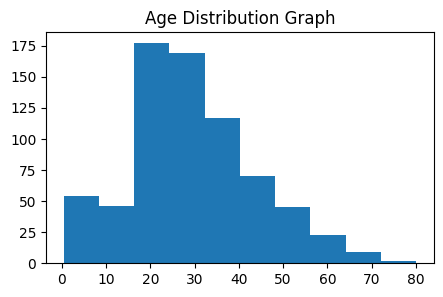

In [39]:
plt.figure (figsize= (5, 3))
plt.hist (df ['Age'])
plt.title ('Age Distribution Graph')
plt.show ()

In [43]:
median = df ['Age'].median ()
df ["Age"] = df ["Age"].fillna (median)

In [ ]:
check_null = df.isna ().sum ()
ratio = check_null / df.shape [0]

pd.DataFrame ({'Number Of Null' : check_null, 'Ratio' : ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Number Of Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


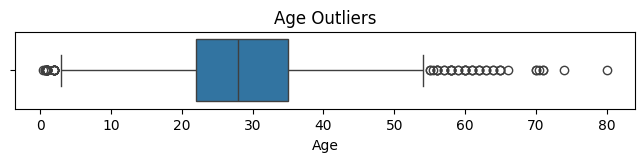

In [ ]:
plt.figure (figsize= (8, 1))
sns.boxplot (df ['Age'], orient= 'h')
plt.title ("Age Outliers")
plt.show ()

# OR

plt.figure (figsize= (8, 1))
plt.boxplot (df ['Age'], orientation= 'horizontal')
plt.title ("Age Outliers")
plt.show ()

In [55]:
Q1 = df ['Age'].quantile (.25)
Q3 = df ['Age'].quantile (.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - 1.5 * IQR
Upper_Fence = Q3 + 1.5 * IQR
Lower_Outliers = df [df ['Age'] < Lower_Fence] ['Age'].values
Upper_Outliers = df [df ['Age'] > Upper_Fence] ['Age'].values
df ['Age'].replace (Lower_Outliers, Lower_Fence, inplace= True)
df ['Age'].replace (Upper_Outliers, Upper_Fence, inplace= True)

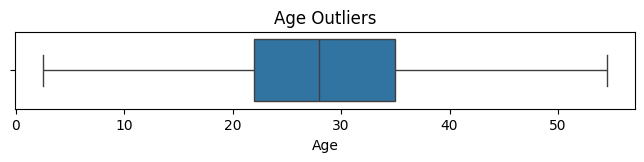

In [ ]:
plt.figure (figsize= (8, 1))
sns.boxplot (df ['Age'], orient= 'h')
plt.title ("Age Outliers")
plt.show ()

# OR

plt.figure (figsize= (8, 1))
plt.boxplot (df ['Age'], orientation= 'horizontal')
plt.title ("Age Outliers")
plt.show ()

In [59]:
df.duplicated ().sum ()

np.int64(122)

In [61]:
df.drop_duplicates (inplace= True)

In [62]:
df.duplicated ().sum ()

np.int64(0)

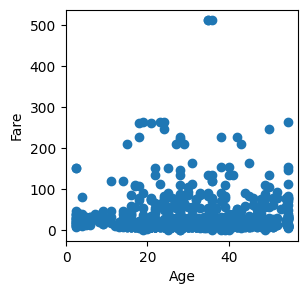

In [65]:
plt.figure (figsize= (3, 3))
plt.scatter (df ["Age"], df ["Fare"])
plt.xlabel ("Age")
plt.ylabel ("Fare")
plt.show ()

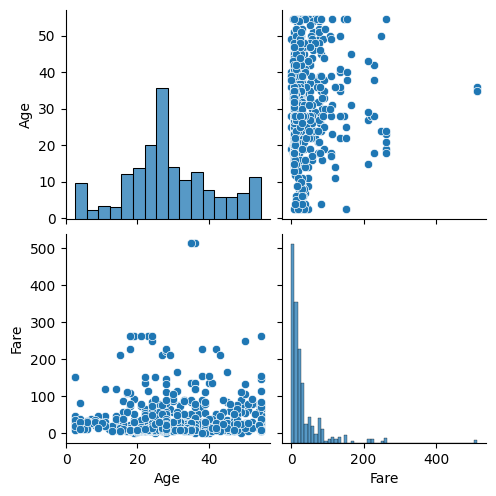

In [67]:
sns.pairplot (df)
plt.show ()

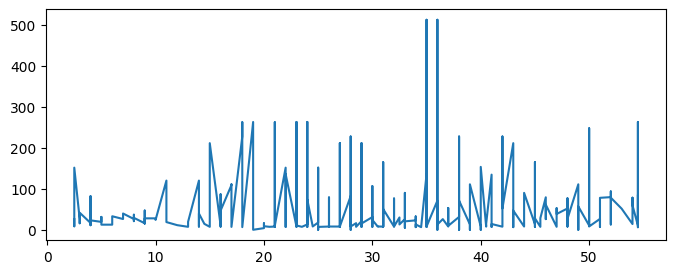

In [68]:
sorted_data = df.sort_values (by= "Age")
plt.figure (figsize= (8, 3))
plt.plot (sorted_data ["Age"], sorted_data ["Fare"])
plt.show ()

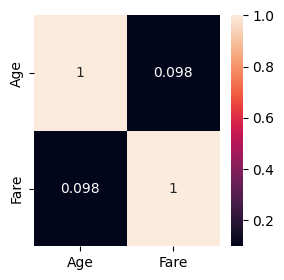

In [70]:
num_col = df.select_dtypes ('number').columns
correlation = df [num_col].corr ()
plt.figure (figsize= (3, 3))
sns.heatmap (correlation, annot= True)
plt.show ()

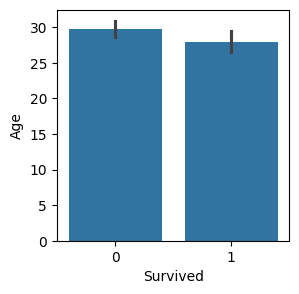

In [71]:
plt.figure (figsize= (3, 3))
sns.barplot (x= 'Survived', y= 'Age', data= df)
plt.show ()

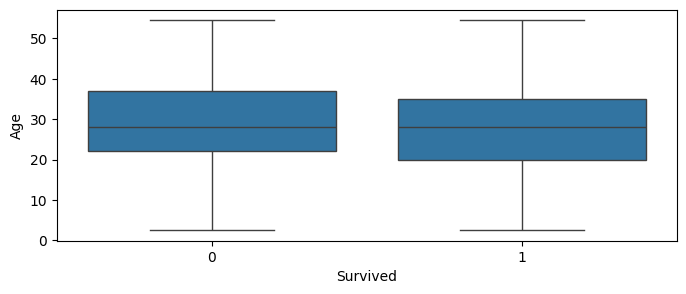

In [ ]:
plt.figure (figsize= (8, 3))
sns.boxplot (x= 'Survived', y= 'Age', data= df)
plt.show ()

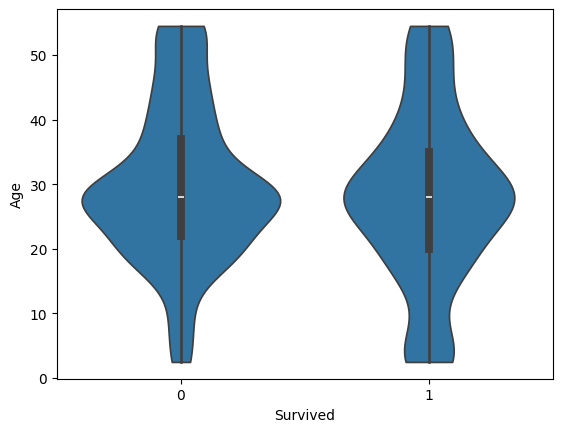

In [ ]:
sns.violinplot(x= 'Survived', y= 'Age', data=df, cut=0)
plt.show ()

# OR
sns.violinplot(x='category', y='value', data=df, inner='box', cut=0)
plt.show ()

# inner = 'box' >> Shows box plot inside violin
# cut = 0       >> Extends density to min/max

C:\Users\aucid\AppData\Local\Temp\ipykernel_29184\2471680552.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  aggregation = df.pivot_table (index= 'Survived', columns= 'Sex', values= 'Fare', aggfunc= len)


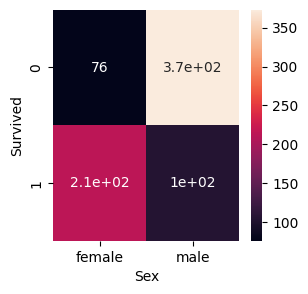

In [79]:
plt.figure (figsize= (3, 3))
aggregation = df.pivot_table (index= 'Survived', columns= 'Sex', values= 'Fare', aggfunc= len)
sns.heatmap (aggregation, annot= True)
plt.show ()

In [ ]:
x = df.drop (columns= 'Survived')
y = df ['Survived']
print (x)
print (y)

    Pclass     Sex   Age SibSp Parch     Fare Embarked
0        3    male  22.0     1     0   7.2500        S
1        1  female  38.0     1     0  71.2833        C
2        3  female  26.0     0     0   7.9250        S
3        1  female  35.0     1     0  53.1000        S
4        3    male  35.0     0     0   8.0500        S
..     ...     ...   ...   ...   ...      ...      ...
885      3  female  39.0     0     5  29.1250        Q
887      1  female  19.0     0     0  30.0000        S
888      3  female  28.0     1     2  23.4500        S
889      1    male  26.0     0     0  30.0000        C
890      3    male  32.0     0     0   7.7500        Q

[767 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 767, dtype: category
Categories (2, int64): [0, 1]


In [86]:
from sklearn.preprocessing import MinMaxScaler

num_col = df.select_dtypes ('number').columns
scale = MinMaxScaler ()
scale.fit (df [num_col])
df [num_col] = scale.transform (df [num_col])

df.head ()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.375000,1,0,0.014151,S
1,1,1,female,0.682692,1,0,0.139136,C
2,1,3,female,0.451923,0,0,0.015469,S
3,1,1,female,0.625000,1,0,0.103644,S
4,0,3,male,0.625000,0,0,0.015713,S


In [88]:
from category_encoders import OneHotEncoder

cat_col = df.select_dtypes ('category').columns
encode = OneHotEncoder (cols= cat_col, drop_invariant= True)
df = encode.fit_transform (df)

df.head ()

,Survived_1,Survived_2,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Age,SibSp_1,SibSp_2,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_7,Fare,Embarked_1,Embarked_2,Embarked_3
0,1,0,1,0,0,1,0,0.375000,1,0,...,0,0,0,0,0,0,0.014151,1,0,0
1,0,1,0,1,0,0,1,0.682692,1,0,...,0,0,0,0,0,0,0.139136,0,1,0
2,0,1,1,0,0,0,1,0.451923,0,1,...,0,0,0,0,0,0,0.015469,1,0,0
3,0,1,0,1,0,0,1,0.625000,1,0,...,0,0,0,0,0,0,0.103644,1,0,0
4,1,0,1,0,0,1,0,0.625000,0,1,...,0,0,0,0,0,0,0.015713,1,0,0
